# Assignment 3 - Airbnb NY dataset,Deadline on Tuedsay, 21st of December @11.59 pm.Send your assignment by email to badr.tarek@guc.edu.eg and have the notebook saved as YOURID-Assgn3

### For this assignment you will be tasked to load the dataset and perform some actions to clean and organise the dataset.

### About the dataset - The New York City Airbnb Open Data is a public dataset and a part of Airbnb. It includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions. This dataset describes the listing activity and metrics in NYC, NY, for 2019. 

## Load dataset  as a dataframe

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import chi2_contingency

In [10]:
data = pd.read_csv("AB_NYC_2019.csv")

## Explore dataset 
- Printout overall info of the dataset
- Preview first 10 rows

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
data.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


## Print out the column names

In [13]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Store the names of the categorical columns (non-integers) in a seperate variable(list)

In [14]:
non_integers_list=data.dtypes[data.dtypes==np.object_]
print(non_integers_list)
categorical_columns=non_integers_list.index.tolist()
print(categorical_columns)

name                   object
host_name              object
neighbourhood_group    object
neighbourhood          object
room_type              object
last_review            object
dtype: object
['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


## Re-edit any column which previews dates so that it is written in the standard date format (tip - use a pandas method which would could change to a date time format)

In [15]:
pd.last_review=pd.to_datetime(data.last_review)
data.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


## Create a function which would take a categorical column and return its cardinality.

In [16]:
def cardinality(col):
    return data[col].nunique()

## Call the function passing in the categorical columns which you previously stored and printout the cardinality of each of them.

In [17]:

for col in categorical_columns:
    print(f'Cardinality of col {col} = {cardinality(col)}')


Cardinality of col name = 47905
Cardinality of col host_name = 11452
Cardinality of col neighbourhood_group = 5
Cardinality of col neighbourhood = 221
Cardinality of col room_type = 3
Cardinality of col last_review = 1764


## Reduce the cardinality of neighbourhood group by observing the percentage of that neighbourhood of the whole neighbourhood group itself(not as a percentage of the whole dataset).If it occurrs less than 5% label it as the name of the neighbourhood it belongs to + rare.For instance in the neighbourhood_group Brooklyn, if a neighbourhood is present in less than 5% of all Brooklyn neighbourhoods then replace it with Brooklyn_rare.<br>Again it is important that you are calculating the percentage out of the neighbourhood group not the whole dataset.

In [18]:
data_dict = {}

def rare_labels(data, variable):
    
    total = len(data.groupby('neighbourhood_group')['neighbourhood'].get_group(variable))
    temp_df = data.groupby('neighbourhood_group')['neighbourhood'].get_group(variable).value_counts()/ total
    temp_df.tolist()

    for col in temp_df.index:
        if temp_df[col] >= 0.05:
            data_dict[col]=col
        else:
            data_dict[col]= variable + "_rare"
            
    tmp = data['neighbourhood'].map(data_dict)

    return tmp

In [19]:
for variable in data['neighbourhood_group'].unique():
    data['neighbourhood_groupped'] = rare_labels(data, variable)

data['neighbourhood'] = data['neighbourhood_groupped'] 
data = data.iloc[: , :-1]
 

In [20]:
data.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Brooklyn_rare,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


## Call your cardinality function created in the beginning to printout the new cardinality of neighbourhood. 

In [21]:
cardinality('neighbourhood')

34

In [22]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Store the names of the columns containing null values.

In [23]:
vars_with_na = []
for col in data.columns:
    if data[col].isnull().sum()>0 :
        vars_with_na.append(col)


#show
vars_with_na

['name', 'host_name', 'last_review', 'reviews_per_month']

## Determine wether each of these missing values are either missing completely at random,missing at random or not missing at random.
### For this task what you could do is observe the relationship between the missing feature and the value of all the other features and identify if there is a reason why the data is missing.
- i.e ( observe the values of the other features when the latest review is missing. For instance, Is there a relationship between the missing reviews and the number of reviews given?)

In [24]:
data_na = data[vars_with_na].isnull().mean()

In [25]:
data_na

name                 0.000327
host_name            0.000429
last_review          0.205583
reviews_per_month    0.205583
dtype: float64

In [26]:
#data[data['name'].isnull()]

In [27]:
data.groupby(data['name'].isnull())['number_of_reviews'].describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
False,48879.0,23.281205,44.556149,0.0,1.0,5.0,24.0,629.0
True,16.0,2.687500,6.973462,0.0,0.0,0.0,1.5,28.0


In [28]:
#data[data['host_name'].isnull()]

In [29]:
data.groupby(data['host_name'].isnull())['number_of_reviews'].describe()

,count,mean,std,min,25%,50%,75%,max
host_name,,,,,,,,
False,48874.0,23.266358,44.544330,0.0,1.0,5.0,24.0,629.0
True,21.0,42.142857,55.419568,0.0,1.0,6.0,81.0,182.0


In [30]:
#data[data['last_review'].isnull()]

In [31]:
data.groupby(data['last_review'].isnull())['number_of_reviews'].describe()

,count,mean,std,min,25%,50%,75%,max
last_review,,,,,,,,
False,38843.0,29.297557,48.186374,1.0,3.0,9.0,33.0,629.0
True,10052.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [32]:
#data[data['reviews_per_month'].isnull()]

In [33]:
data.groupby(data['reviews_per_month'].isnull())['number_of_reviews'].describe()

,count,mean,std,min,25%,50%,75%,max
reviews_per_month,,,,,,,,
False,38843.0,29.297557,48.186374,1.0,3.0,9.0,33.0,629.0
True,10052.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


## In the cell below write down the feature name followed by either MCAR,MAR,MNAR and state your reason.


Feature ==> name - MCAR <br>
Feature ==> host_name - MCAR <br>
Feature ==> last_review - MNAR <br>
Feature ==> reviews_per_month - MNAR <br>

For both <bf>Name</bf> and <bf>Host_name</bf> there is no explicit or implicit relation between the missing values and the any other attributes, so it is Missing Completly at Random. <br>

However, for last_review and reviews_per_month there exist a definit reason between the missing values and the number_of_review, whenever there is no reviews implies missing values. (As Dr.Maggie said)


## Split the dataset to a training and test, set with the price as the target and all other features as the predictors. Split the dataset 70 percent training and 30 percent test. Random state specified to 0.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    data,  # predictors
    data['price'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility
X_train.shape,X_test.shape,data.shape

((34226, 16), (14669, 16), (48895, 16))

In [36]:
X_train.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
13115,9920191,Bright 2 Bdrm Apt in Williamsburg,6896056,Jonathan,Brooklyn,Williamsburg,40.71569,-73.93735,Entire home/apt,180,7,0,NaN,NaN,1,0


## Impute the missing values in the best way which you see fits according to the reason you specified why the feature is missing.Remember if there is any calculations to be done it should be done from the training set and then impute it in both the training and test.

In [37]:
X_train=X_train.dropna(subset=["name","host_name"])
X_test=X_test.dropna(subset=["name","host_name"])

In [38]:
data[vars_with_na].dtypes

name                  object
host_name             object
last_review           object
reviews_per_month    float64
dtype: object

In [39]:
X_train['last_review'].fillna('Missing', inplace=True)
X_test['last_review'].fillna('Missing', inplace=True)

In [40]:
data_na = X_train[vars_with_na].isnull().mean()
data_na

name                 0.000000
host_name            0.000000
last_review          0.000000
reviews_per_month    0.205082
dtype: float64

In [41]:
X_train['reviews_per_month'].fillna(-99.9, inplace=True)
X_test['reviews_per_month'].fillna(-99.9, inplace=True)

## Check that all null values has been removed.

In [42]:
data_na = X_train[vars_with_na].isnull().mean()
data_na

name                 0.0
host_name            0.0
last_review          0.0
reviews_per_month    0.0
dtype: float64

In [43]:
data_na = X_test[vars_with_na].isnull().mean()
data_na

name                 0.0
host_name            0.0
last_review          0.0
reviews_per_month    0.0
dtype: float64

## Encode these following features in the test and train. Neighboorhood_group,room_type.  Use one hot encoding k-1.Print out the frist five rows of each new dataframe created.


In [44]:
encoder = OneHotEncoder(categories='auto',
                       drop='first', 
                       sparse=False,
                       handle_unknown='error')
encoder.fit(X_train[['neighbourhood_group' , 'room_type']])
tmp = encoder.transform(X_train[['neighbourhood_group' , 'room_type']])
tmp = pd.DataFrame(tmp)
tmp.columns = encoder.get_feature_names()
tmp.head()

,x0_Brooklyn,x0_Manhattan,x0_Queens,x0_Staten Island,x1_Private room,x1_Shared room
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


## Visualise the relationship between a neighbourhood_group and the avg price of it by creating a bar graph.Label the graph appropriately and show it. You can use the data from the original dataframe.  

Text(0, 0.5, 'avg price')

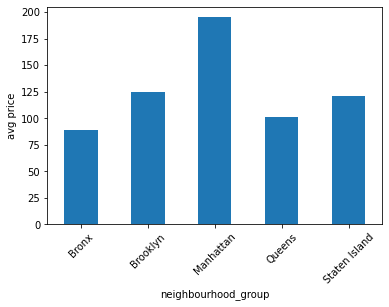

In [86]:
X_train.groupby('neighbourhood_group')['price'].mean().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('avg price')

In [87]:
print("ABDELMAKSOUD")

ABDELMAKSOUD
